In [74]:
import numpy as np
print(np.__version__)

1.16.5


In [2]:
!pip install numpy==1.16.5
!pip install pandas==0.24.2

# Gathering Data

# DNA data handling using Biopython

Here is a brief example of how to work with a DNA sequence in fasta format using Biopython. The sequence object will contain attributes such as id and sequence and the length of the sequence that you can work with directly.

We will use Bio.SeqIO from Biopython for parsing DNA sequence data(fasta). It provides a simple uniform interface to input and output assorted sequence file formats.

In [1]:
filename='virus dataset.fasta'

In [2]:
from Bio import SeqIO

In [3]:
seq_obj=SeqIO.parse(filename,'fasta')

In [4]:
sequences=[]

In [5]:
for seq in seq_obj:
    sequences.append(seq)

In [6]:
len(sequences)

34550

In [7]:
f_rec=sequences[30]
print(f_rec.id)
print(f_rec.description)
print(len(f_rec.seq))

JX878410.1
JX878410.1 Monkeypox virus isolate DRC 06-1070, complete genome
198886


In [8]:
for record in sequences:
    seq_id=record.id
    seq_name=record.name
    seq_desc=record.description
    sequence=record.seq
    length=len(sequence)

In [9]:
seq_ids=[]
seq_lengths=[]
seqs=[]
seq_descs=[]
label=[]

In [10]:
for record in sequences:
    seq_id=record.id
    sequence=record.seq[200:1500]
    seq_desc=record.description
    if('coronavirus' in seq_desc):
        label.append('COVID-19')
    elif('Dengue' in seq_desc):
        label.append('Dengue')
    elif('Monkeypox' in seq_desc):
        label.append('Monkeypox')
    elif('Hepatitis B' in seq_desc):
        label.append('Hepatitis B')
    elif('Hepatitis C' in seq_desc):
        label.append('Hepatitis C')
    elif('HIV' in seq_desc):
        label.append('HIV')
    elif('Human respiratory syncytial' in seq_desc):
        label.append('Human orthopneumovirus')
    elif('TTV-like' in seq_desc):
        label.append('TTV-like')
    elif('Influenza A' in seq_desc):
        label.append('Influenza A')
    else:
        label.append(None)
    
    length=len(sequence)
    
    seq_ids.append(seq_id)
    seq_descs.append(seq_desc)
    
    seq_lengths.append(length)
    seqs.append(sequence)

# Data preparation


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
dataframe=pd.DataFrame()
dataframe['seq_id']=seq_ids
dataframe['seq_desc']=seq_descs
dataframe['label']=label
dataframe['seq_length']=seq_lengths
dataframe['Dna Seq']=seqs

In [13]:
dataframe=dataframe[dataframe['seq_length'].notnull()]
dataframe=dataframe[dataframe['label'].notnull()]
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25537 entries, 10 to 34475
Data columns (total 5 columns):
seq_id        25537 non-null object
seq_desc      25537 non-null object
label         25537 non-null object
seq_length    25537 non-null int64
Dna Seq       25537 non-null object
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


In [14]:
dataframe.head(15)

,seq_id,seq_desc,label,seq_length,Dna Seq
10,ON675438.1,ON675438.1 Monkeypox virus isolate MPXV_USA_20...,Monkeypox,1300,"(C, G, A, A, G, A, G, A, G, A, A, A, G, A, G, ..."
11,JX878429.1,JX878429.1 Monkeypox virus isolate DRC 07-0662...,Monkeypox,1300,"(A, A, A, C, T, T, T, T, T, A, C, G, A, C, T, ..."
12,JX878428.1,JX878428.1 Monkeypox virus isolate DRC 07-0514...,Monkeypox,1300,"(A, A, A, C, T, T, T, T, T, A, C, G, A, C, T, ..."
13,JX878427.1,JX878427.1 Monkeypox virus isolate DRC 07-0480...,Monkeypox,1300,"(A, A, A, C, T, T, T, T, T, A, C, G, A, C, T, ..."
14,JX878426.1,JX878426.1 Monkeypox virus isolate DRC 07-0450...,Monkeypox,1300,"(G, T, T, A, G, T, C, A, A, G, A, T, A, T, T, ..."
15,JX878425.1,JX878425.1 Monkeypox virus isolate DRC 07-0354...,Monkeypox,1300,"(A, A, A, C, T, T, T, T, T, A, C, G, A, C, T, ..."
16,JX878424.1,JX878424.1 Monkeypox virus isolate DRC 07-0338...,Monkeypox,1300,"(A, A, A, C, T, T, T, T, T, A, C, G, A, C, T, ..."
17,JX878423.1,JX878423.1 Monkeypox virus isolate DRC 07-0337...,Monkeypox,1300,"(A, A, A, C, T, T, T, T, T, A, C, G, A, C, T, ..."
18,JX878422.1,JX878422.1 Monkeypox virus isolate DRC 07-0287...,Monkeypox,1300,"(A, A, A, C, T, T, T, T, T, A, C, G, A, C, T, ..."
19,JX878421.1,JX878421.1 Monkeypox virus isolate DRC 07-0286...,Monkeypox,1300,"(A, A, A, C, T, T, T, T, T, A, C, G, A, C, T, ..."


In [15]:
dataframe['Dna Seq']=dataframe['Dna Seq'].astype(str)

In [16]:
dataframe['Dna Seq']=dataframe['Dna Seq'].apply(lambda x:x.replace('(','').replace(',','').replace(')',''))

In [17]:
dataframe.head(15)

,seq_id,seq_desc,label,seq_length,Dna Seq
10,ON675438.1,ON675438.1 Monkeypox virus isolate MPXV_USA_20...,Monkeypox,1300,CGAAGAGAGAAAGAGATGGTTAGTCAAGATATTTTTCTTAGTACAA...
11,JX878429.1,JX878429.1 Monkeypox virus isolate DRC 07-0662...,Monkeypox,1300,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...
12,JX878428.1,JX878428.1 Monkeypox virus isolate DRC 07-0514...,Monkeypox,1300,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...
13,JX878427.1,JX878427.1 Monkeypox virus isolate DRC 07-0480...,Monkeypox,1300,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...
14,JX878426.1,JX878426.1 Monkeypox virus isolate DRC 07-0450...,Monkeypox,1300,GTTAGTCAAGATATTTTTCTTAGTACAAAAGTCAATGTTTTAAAAT...
15,JX878425.1,JX878425.1 Monkeypox virus isolate DRC 07-0354...,Monkeypox,1300,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...
16,JX878424.1,JX878424.1 Monkeypox virus isolate DRC 07-0338...,Monkeypox,1300,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...
17,JX878423.1,JX878423.1 Monkeypox virus isolate DRC 07-0337...,Monkeypox,1300,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...
18,JX878422.1,JX878422.1 Monkeypox virus isolate DRC 07-0287...,Monkeypox,1300,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...
19,JX878421.1,JX878421.1 Monkeypox virus isolate DRC 07-0286...,Monkeypox,1300,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...


In [18]:
dataframe['label'].value_counts()

Hepatitis B               8625
HIV                       5106
Dengue                    4333
TTV-like                  2487
Human orthopneumovirus    1724
Monkeypox                 1031
COVID-19                   875
Hepatitis C                811
Influenza A                545
Name: label, dtype: int64

In [19]:
count=0
for f_seq in seqs:
    if(len(f_seq)>3000):
        count+=1
    
    
print(count)

0


In [20]:
dataframe=dataframe.drop(['seq_id','seq_length','seq_desc'],axis=1)

In [21]:
dataframe.tail(15)

,label,Dna Seq
34434,HIV,TCATCACACAGCCCGCGAGGTGCATCCGGAGTACTACAAGGACTGC...
34435,HIV,TCATCACGTGGCCCGAGAGCAGATTGGTTGCACTTTAAATTTTCCA...
34436,HIV,GAGAAAATTAGGTTAAGGCCAGGGGGAAAGAAACATTATATGCTAA...
34437,HIV,GAGAAAATTAGGTTAAGGCCAGGGGGAAAGAAACACTATAGGCTAA...
34438,HIV,GAGAGAATTAAGTTAAGGCCAGGGGGAAAGAAACACTATATGCTAA...
34439,HIV,GAGAAAATTAGGTTAAGGCCAGGGGGAAAGAAACACTATATGCTAA...
34440,HIV,GAGAAAATTAGGTTAAGGCCAGGGGGAAAGAAACACTATATGCTAA...
34441,HIV,GAGAAAATTAGGTTAAGGCCAGGGGGAAAGAAACACTATATGCTAA...
34442,HIV,GAAAAAATTAGGTTAAGGCCAGGGGGAAAGAAACACTATATGCTAA...
34443,HIV,GAGAAAATTAGGTTAAGGCCAGGGGGAAAGAAACATTATATGCTAA...


Text(0.5, 1.0, 'label distribution of viruses DNA')

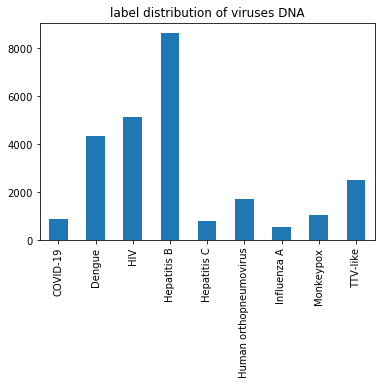

In [22]:
dataframe['label'].value_counts().sort_index().plot.bar()
plt.title("label distribution of viruses DNA")

In [23]:
def clean_Labels(x):
    
    if x=='Monkeypox':
        return 1
    if x == 'HIV':
        return 2
    if x=='Dengue':
        return 3
    if x == 'Human orthopneumovirus':
        return 4
    if x=='Hepatitis B':
        return 5
    if x == 'COVID-19':
        return 6
    if x=='Hepatitis C':
        return 7
    if x=='TTV-like':
        return 8
    if x=='Influenza A':
        return 9
    
    
    return float(x)

In [24]:
dataframe['label']=dataframe['label'].apply(clean_Labels)

In [25]:
dataframe['label'].to_numpy()

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [26]:
dataframe['label'].unique()

array([1, 2, 5, 3, 6, 4, 7, 8, 9], dtype=int64)

Text(0.5, 1.0, 'label distribution of viruses DNA')

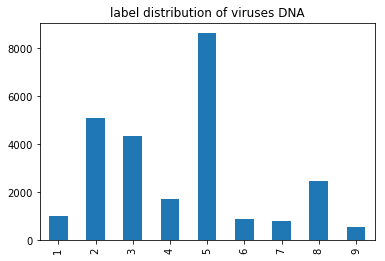

In [27]:
dataframe['label'].value_counts().sort_index().plot.bar()
plt.title("label distribution of viruses DNA")

In [28]:
dataframe.head()

,label,Dna Seq
10,1,CGAAGAGAGAAAGAGATGGTTAGTCAAGATATTTTTCTTAGTACAA...
11,1,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...
12,1,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...
13,1,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...
14,1,GTTAGTCAAGATATTTTTCTTAGTACAAAAGTCAATGTTTTAAAAT...


# DNA sequence as a “language”, known as k-mer counting

A hurdle that still remains is that none of these above methods results in vectors of uniform length, and that is a necessity for feeding data to a classification or regression algorithm. So with the above methods, you have to resort to things like truncating sequences or padding with “n” or “0” to get vectors of uniform length.

DNA and protein sequences can be seen as the language of life. The language encodes instructions as well as functions for the molecules that are found in all life forms. The sequence language resemblance continues with the genome as the book, subsequences (genes and gene families) are sentences and chapters, k-mers and peptides are words, and nucleotide bases and amino acids are the alphabets. Since the relationship seems so likely, it stands to reason that the natural language processing(NLP) should also implement the natural language of DNA and protein sequences.

The method we use here is manageable and easy. We first take the long biological sequence and break it down into k-mer length overlapping “words”. For example, if we use “words” of length 6 (hexamers), “ATGCATGCA” becomes: ‘ATGCAT’, ‘TGCATG’, ‘GCATGC’, ‘CATGCA’. Hence our example sequence is broken down into 4 hexamer words.

In genomics, we refer to these types of manipulations as “k-mer counting”, or counting the occurrences of each possible k-mer sequence and Python natural language processing tools make it super easy.

In [29]:
def Kmers_funct(seq, size=3):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

In [30]:
#So let’s try it out with a simple sequence:
mySeq = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
Kmers_funct(mySeq, size=7)

['gtgccca',
 'tgcccag',
 'gcccagg',
 'cccaggt',
 'ccaggtt',
 'caggttc',
 'aggttca',
 'ggttcag',
 'gttcagt',
 'ttcagtg',
 'tcagtga',
 'cagtgag',
 'agtgagt',
 'gtgagtg',
 'tgagtga',
 'gagtgac',
 'agtgaca',
 'gtgacac',
 'tgacaca',
 'gacacag',
 'acacagg',
 'cacaggc',
 'acaggca',
 'caggcag']

It returns a list of k-mer “words.” You can then join the “words” into a “sentence”, then apply your favorite natural language processing methods on the “sentences” as you normally would.

In [31]:
words = Kmers_funct(mySeq, size=4)
joined_sentence = ' '.join(words)
joined_sentence

'gtgc tgcc gccc ccca ccag cagg aggt ggtt gttc ttca tcag cagt agtg gtga tgag gagt agtg gtga tgac gaca acac caca acag cagg aggc ggca gcag'

You can tune both the word length and the amount of overlap. This allows you to determine how the DNA sequence information and vocabulary size will be important in your application. For example, if you use words of length 6, and there are 4 letters, you have a vocabulary of size 4096 possible words. You can then go on and create a bag-of-words model like you would in NLP.

Let’s make a couple more “sentences” to make it more interesting.

In [32]:
mySeq1 = 'TCTCACACATGTGCCAATCACTGTCACCC'
mySeq2 = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
sentence1 = ' '.join(Kmers_funct(mySeq1, size=6))
sentence2 = ' '.join(Kmers_funct(mySeq2, size=6))

In [33]:
#Creating the Bag of Words model:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform([joined_sentence, sentence1, sentence2]).toarray()
X

C:\Users\Administrator\anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


array([[0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 1]], dtype=int64)

In [34]:
dataframe['words'] = dataframe.apply(lambda x: Kmers_funct(x['Dna Seq']), axis=1)
dataframe = dataframe.drop('Dna Seq', axis=1)

In [35]:
dataframe.head()

,label,words
10,1,"[cga, gaa, aag, aga, gag, aga, gag, aga, gaa, ..."
11,1,"[aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, ..."
12,1,"[aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, ..."
13,1,"[aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, ..."
14,1,"[gtt, tta, tag, agt, gtc, tca, caa, aag, aga, ..."


In [36]:
dataframe['words']

10       [cga, gaa, aag, aga, gag, aga, gag, aga, gaa, ...
11       [aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, ...
12       [aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, ...
13       [aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, ...
14       [gtt, tta, tag, agt, gtc, tca, caa, aag, aga, ...
15       [aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, ...
16       [aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, ...
17       [aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, ...
18       [aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, ...
19       [aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, ...
20       [gtt, tta, tag, agt, gtc, tca, caa, aag, aga, ...
21       [gtt, tta, tag, agt, gtc, tca, caa, aag, aga, ...
22       [gtt, tta, tag, agt, gtc, tca, caa, aag, aga, ...
23       [aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, ...
24       [aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, ...
25       [aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, ...
26       [aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, .

# separate the labels

We need to now convert the lists of k-mers for each gene into string sentences of words that can be used to create the Bag of Words model. We will make a target variable y to hold the class labels.

In [37]:
dna_texts = list(dataframe['words'])
for item in range(len(dna_texts)):
    dna_texts[item] =' '.join(dna_texts[item])
#separate labels
y_data = dataframe.iloc[:, 0].values

In [38]:
y_data
print(dna_texts[3])

aaa aac act ctt ttt ttt ttt tta tac acg cga gac act ctc tcc cca cat atc tca cag aga gaa aaa aag aga gag agg ggt gtt ttt tta taa aat ata tat att ttt ttt ttt ttg tgt gtg tga gag aga gac acc ccc cca cat atc tcg cga gaa aag aga gag aga gag aga gaa aaa aag agg gga gat ata taa aaa aaa aaa aac act ctt ttt ttt ttt tta tac acg cga gac act ctc tcc cca cat atc tca cag aga gaa aaa aag aga gag agg ggt gtt ttt tta taa aat ata tat att ttt ttt ttt ttg tgt gtg tga gag aga gac acc ccc cca cat atc tcg cga gac acg cga gag aga gag aga gaa aaa aag agg gga gat ata taa aaa aaa aaa aac act ctt ttt ttt ttt tta tac acg cga gac act ctc tcc cca cat atc tca cag aga gaa aaa aag aga gag agg ggt gtt ttt tta taa aat ata tat att ttt ttt ttt ttg tgt gtg tga gag aga gac acc ccc cca cat atc tcg cga gac acg cga gag aga gag aga gaa aaa aag aga gag aga gat atg tgg ggt gtt tta tag agt gtc tca caa aag aga gat ata tat att ttt ttt ttt ttc tct ctt tta tag agt gta tac aca caa aaa aaa aag agt gtc tca caa aat atg tgt gtt ttt ttt tta 

In [39]:
y_data

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

So the target variable contains an array of class values.

Creating the Bag of Words model using CountVectorizer(). This is equivalent to k-mer counting. The n-gram size of 4 was previously determined by testing.

Convert our k-mer words into uniform length numerical vectors that represent counts for every k-mer in the vocabulary:

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4)) #The n-gram size of 4 is previously determined by testing
X = cv.fit_transform(dna_texts)

In [41]:
print(X.shape)


(25537, 23292)


So we have 25537 genes converted into uniform length feature vectors of 4-gram k-mer (length 3) counts.

# Splitting the dna dataset into the training set and test set


So now that we know how to transform our DNA sequences into uniform length numerical vectors in the form of k-mer counts and ngrams, we can now go ahead and build a classification model that can predict the DNA sequence function based only on the sequence itself.

Here we will use the X data to train the model, holding out 20% of the data to test the model. 

Next, train/test split the dataset and build simple multinomial naive Bayes classifier.



In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_data, 
                                                    test_size = 0.20, 
                                                    random_state=42)

In [43]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

# make predictions on the hold out test set and see how it performes on unseen data.

In [44]:
y_pred = classifier.predict(X_test)



Now, so let's look at some model performce metrics like the confusion matrix, accuracy, precision, recall and f1 score.

In [45]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted    1     2    3    4     5    6    7    8   9
Actual                                                 
1          207     0    0    0     0    0    0    0   0
2            0  1042    0    0     0    1    0    1  10
3            0     0  891    0     0    0    0    0   1
4            0     0    0  356     0    0    0    0   0
5            0     0    0    0  1603    0    0   64  31
6            0     0    0    0     0  161    0    0   4
7            0     0    0    0     0    0  156    0   0
8            0     0    0    0     0    0    0  487   0
9            0     0    0    0     0    0    0    0  93
accuracy = 0.978 
precision = 0.983 
recall = 0.978 
f1 = 0.979
